<a href="https://colab.research.google.com/github/AliQadri581/Data-Science-Projects/blob/main/IPL_Ball_to_ball_Match_win_lose_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [ ]:
print(matches.columns)

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [ ]:
matches.head() # fisrt five results

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.tail() #last five results

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
matches.shape #shows rows and cols

(756, 18)

In [ ]:
print(deliveries.columns)
#shows the names of the columns included in the dataset

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [ ]:
deliveries.head()
#this shows the first five results in the data set

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries.tail()
#this shows the last five results in the dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
deliveries.shape
#shows number of rows and columns

(179078, 21)

In [ ]:
deliveries.groupby(['match_id', 'inning'])['total_runs'].sum()
#we have grouped the match id and inning, we also have a sum of total runs according to the grouped matchid and innings

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [ ]:
total_match_score = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
#converts the grouped cols into regular cols

In [ ]:
total_match_score

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [ ]:
total_match_score = total_match_score[total_match_score['inning'] == 1]
#cleaning the data by showing only the scores made in the 1st innings

In [ ]:
total_match_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_table = matches.merge(total_match_score[['match_id','total_runs']], right_on='match_id',left_on='id')
#we merged the matches table with few cols of total_match_score table like match_id and total_runs which shows all the details of matches with the total_runs in the 1st innings

In [ ]:
match_table

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


<Axes: >

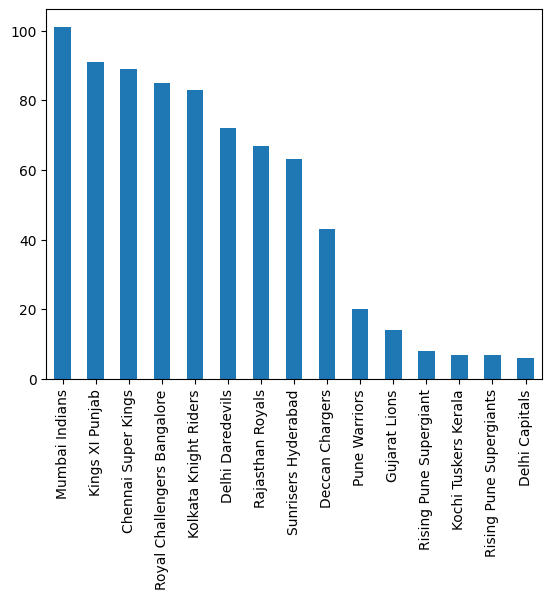

In [ ]:
match_table['team1'].value_counts().plot(kind='bar')
#total teams jannay k liye unique use kia hai jo k repeatition avoid kr rah hai teams ki

<Axes: >

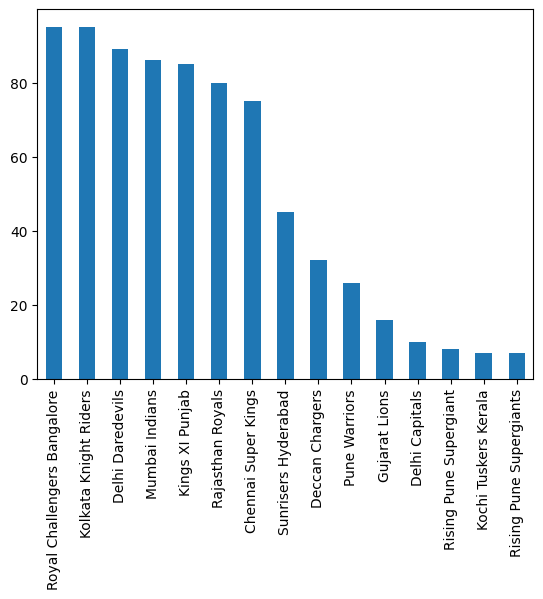

In [ ]:
match_table['team2'].value_counts().plot(kind='bar')

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]
# current playing teams in IPL

In [ ]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
match_table['team1'] = match_table['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_table['team2'] = match_table['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_table['team1'] = match_table['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_table['team2'] = match_table['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
#replacing the teams names because it is now taken over the the teams which are replacing with

In [ ]:
match_table = match_table[match_table['team1'].isin(teams)]
match_table = match_table[match_table['team2'].isin(teams)]

<Axes: >

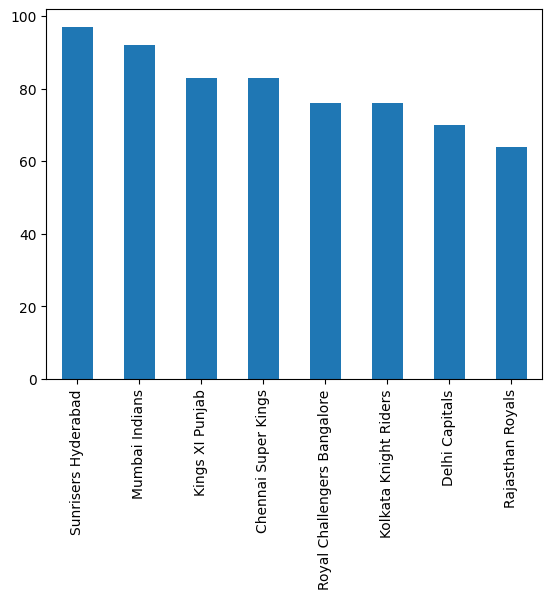

In [ ]:
match_table['team1'].value_counts().plot(kind='bar')

<Axes: >

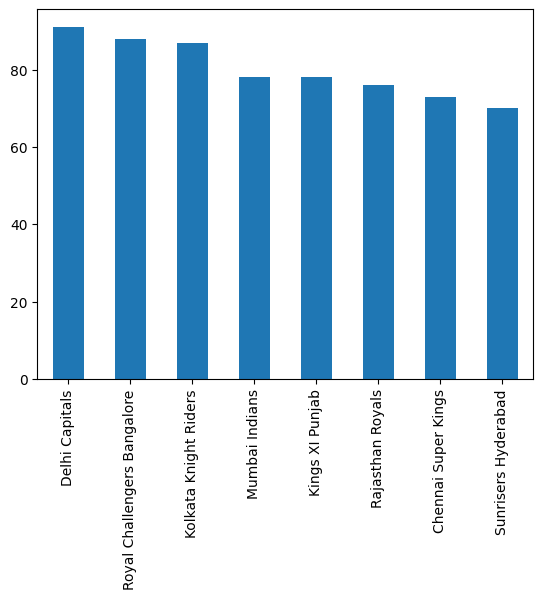

In [ ]:
match_table['team2'].value_counts().plot(kind='bar')

In [ ]:
match_table.shape

(641, 20)

In [ ]:
match_table

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


<Axes: ylabel='dl_applied'>

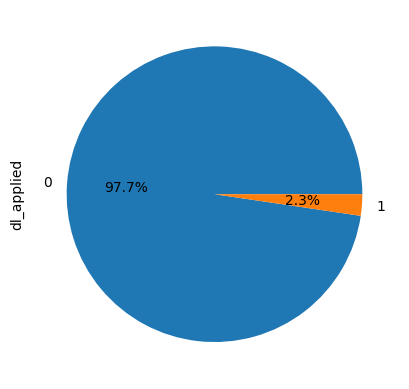

In [ ]:
match_table['dl_applied'].value_counts().plot(kind='pie' , autopct='%1.1f%%' )

In [ ]:
match_table = match_table[match_table['dl_applied'] == 0]
#removed all the matches where the match was affected by D/L method

<Axes: ylabel='dl_applied'>

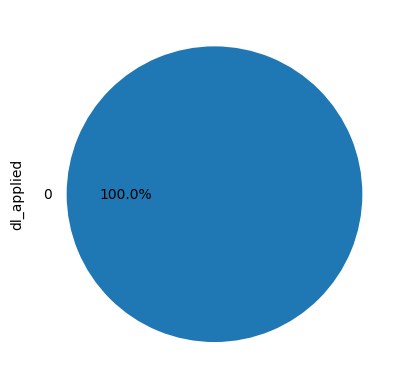

In [ ]:
match_table['dl_applied'].value_counts().plot(kind='pie' , autopct='%1.1f%%')

In [ ]:
match_table

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_table = match_table[['match_id', 'city', 'winner', 'total_runs']]
#only need these cols from match_table

In [ ]:
match_table

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [ ]:
#merging match table with deliveries table
deliveries_table = match_table.merge(deliveries, on='match_id')

In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_table = deliveries_table[deliveries_table['inning'] == 2]
#filtering the data beacuse the win predictor will work on the performance of the 2nd innings

In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_table.shape

(72413, 24)

In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
deliveries_table['current_score'] = deliveries_table.groupby('match_id').cumsum()['total_runs_y']
#grouping by match id and taking out cumulative sum

<ipython-input-148-04d80655c699>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deliveries_table['current_score'] = deliveries_table.groupby('match_id').cumsum()['total_runs_y']
<ipython-input-148-04d80655c699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['current_score'] = deliveries_table.groupby('match_id').cumsum()['total_runs_y']


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [ ]:
deliveries_table['runs_required'] = deliveries_table['total_runs_x'] - deliveries_table['current_score']
#this tells how many runs left after every ball played by a player in the match

<ipython-input-150-96b6fa2df968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['runs_required'] = deliveries_table['total_runs_x'] - deliveries_table['current_score']


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [ ]:
deliveries_table['deliveries_left'] = (20 - deliveries_table['over']) * 6 + (6 - deliveries_table['ball'])
#this tells the number of deliveries left in an innings after facing every ball the table will be updated

<ipython-input-152-33b243ff4392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['deliveries_left'] = (20 - deliveries_table['over']) * 6 + (6 - deliveries_table['ball'])


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [ ]:
deliveries_table['player_dismissed'] = deliveries_table['player_dismissed'].fillna("0")

<ipython-input-154-b10af77a443e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['player_dismissed'] = deliveries_table['player_dismissed'].fillna("0")


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,0,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,0,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,0,NaN,NaN,157,-5,1


In [ ]:
deliveries_table['player_dismissed'] = deliveries_table['player_dismissed'].apply(lambda x:x if x == "0" else "1")
#it turns NaN into 0 and wicket into 1

<ipython-input-156-3647f887fe29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['player_dismissed'] = deliveries_table['player_dismissed'].apply(lambda x:x if x == "0" else "1")


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,0,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,0,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,1,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,0,NaN,NaN,157,-5,1


In [ ]:
deliveries_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72413 entries, 125 to 149577
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          72413 non-null  int64 
 1   city              71581 non-null  object
 2   winner            72386 non-null  object
 3   total_runs_x      72413 non-null  int64 
 4   inning            72413 non-null  int64 
 5   batting_team      72413 non-null  object
 6   bowling_team      72413 non-null  object
 7   over              72413 non-null  int64 
 8   ball              72413 non-null  int64 
 9   batsman           72413 non-null  object
 10  non_striker       72413 non-null  object
 11  bowler            72413 non-null  object
 12  is_super_over     72413 non-null  int64 
 13  wide_runs         72413 non-null  int64 
 14  bye_runs          72413 non-null  int64 
 15  legbye_runs       72413 non-null  int64 
 16  noball_runs       72413 non-null  int64 
 17  penalty_r

In [ ]:
deliveries_table['player_dismissed'] = deliveries_table['player_dismissed'].astype('int')
#converting the whole column into integer as now it contains the numbers

<ipython-input-159-6838071fa610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['player_dismissed'] = deliveries_table['player_dismissed'].astype('int')


In [ ]:
wickets = deliveries_table.groupby('match_id').cumsum()['player_dismissed'].values
#cumulative sum of the wickets and groupby over matchid
#also tells how many wickets are down after every ball
deliveries_table['wickets'] = 10 - wickets

<ipython-input-160-8603c3bd47b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = deliveries_table.groupby('match_id').cumsum()['player_dismissed'].values
<ipython-input-160-8603c3bd47b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['wickets'] = 10 - wickets


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


In [ ]:
deliveries_table['current_runrate'] = (deliveries_table['current_score']*6)/(120 - deliveries_table['deliveries_left'])

<ipython-input-162-9676872250da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['current_runrate'] = (deliveries_table['current_score']*6)/(120 - deliveries_table['deliveries_left'])


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left,wickets,current_runrate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.000000
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,10,3.000000
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,117,10,2.000000
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,204,116,10,4.500000
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,200,115,10,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,152,0,4,5,7.862069
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,154,-2,3,5,7.897436
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-3,2,4,7.881356
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,157,-5,1,4,7.915966


In [ ]:
deliveries_table['Required_runrate'] = (deliveries_table['runs_required']*6)/deliveries_table['deliveries_left']

<ipython-input-164-ed943c5bc813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['Required_runrate'] = (deliveries_table['runs_required']*6)/deliveries_table['deliveries_left']


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left,wickets,current_runrate,Required_runrate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
    #if batting is equal to winner make it a winner

In [ ]:
deliveries_table['result'] = deliveries_table.apply(result,axis=1)

<ipython-input-167-3df48961776e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries_table['result'] = deliveries_table.apply(result,axis=1)


In [ ]:
deliveries_table

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_required,deliveries_left,wickets,current_runrate,Required_runrate,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [ ]:
final_table = deliveries_table[['batting_team','bowling_team','city','runs_required','deliveries_left','wickets','total_runs_x','current_runrate','Required_runrate','result']]

In [ ]:
final_table

,batting_team,bowling_team,city,runs_required,deliveries_left,wickets,total_runs_x,current_runrate,Required_runrate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [ ]:
final_table = final_table.sample(final_table.shape[0])
#shuffling the data because it might bring biasness in the result

In [ ]:
final_table.sample()

,batting_team,bowling_team,city,runs_required,deliveries_left,wickets,total_runs_x,current_runrate,Required_runrate,result
98061,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,170,92,9,195,5.357143,11.086957,0


In [ ]:
final_table.isnull().sum()

batting_team          0
bowling_team          0
city                832
runs_required         0
deliveries_left       0
wickets               0
total_runs_x          0
current_runrate       0
Required_runrate      7
result                0
dtype: int64

In [ ]:
final_table.dropna(inplace=True)

In [ ]:
final_table.isnull().sum()

batting_team        0
bowling_team        0
city                0
runs_required       0
deliveries_left     0
wickets             0
total_runs_x        0
current_runrate     0
Required_runrate    0
result              0
dtype: int64

In [ ]:
final_table

,batting_team,bowling_team,city,runs_required,deliveries_left,wickets,total_runs_x,current_runrate,Required_runrate,result
113060,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,59,74,10,113,7.043478,4.783784,1
20444,Chennai Super Kings,Mumbai Indians,Cape Town,57,31,5,165,7.280899,11.032258,0
79480,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,111,76,8,171,8.181818,8.763158,1
82371,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,80,2,3,223,7.271186,240.000000,0
28076,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,156,116,10,157,1.500000,8.068966,0
...,...,...,...,...,...,...,...,...,...,...
136398,Chennai Super Kings,Delhi Capitals,Delhi,44,53,8,154,9.850746,4.981132,1
2130,Kings XI Punjab,Delhi Daredevils,Delhi,106,45,5,188,6.560000,14.133333,0
41770,Royal Challengers Bangalore,Delhi Daredevils,Delhi,130,62,8,184,5.586207,12.580645,0
47964,Kolkata Knight Riders,Chennai Super Kings,Chennai,120,99,10,153,9.428571,7.272727,0


In [ ]:
final_table = final_table[final_table['deliveries_left'] != 0]

In [ ]:
final_table

,batting_team,bowling_team,city,runs_required,deliveries_left,wickets,total_runs_x,current_runrate,Required_runrate,result
113060,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,59,74,10,113,7.043478,4.783784,1
20444,Chennai Super Kings,Mumbai Indians,Cape Town,57,31,5,165,7.280899,11.032258,0
79480,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,111,76,8,171,8.181818,8.763158,1
82371,Sunrisers Hyderabad,Chennai Super Kings,Hyderabad,80,2,3,223,7.271186,240.000000,0
28076,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,156,116,10,157,1.500000,8.068966,0
...,...,...,...,...,...,...,...,...,...,...
136398,Chennai Super Kings,Delhi Capitals,Delhi,44,53,8,154,9.850746,4.981132,1
2130,Kings XI Punjab,Delhi Daredevils,Delhi,106,45,5,188,6.560000,14.133333,0
41770,Royal Challengers Bangalore,Delhi Daredevils,Delhi,130,62,8,184,5.586207,12.580645,0
47964,Kolkata Knight Riders,Chennai Super Kings,Chennai,120,99,10,153,9.428571,7.272727,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_table.iloc[:,:-1] # Selecting all columns except the last one
y = final_table.iloc[:,-1]  # Selecting only the last column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_required,deliveries_left,wickets,total_runs_x,current_runrate,Required_runrate
97903,Mumbai Indians,Kings XI Punjab,Chandigarh,5,11,7,156,8.311927,2.727273
35657,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,71,111,10,92,14.000000,3.837838
114927,Delhi Daredevils,Kings XI Punjab,Delhi,98,94,9,111,3.000000,6.255319
46280,Chennai Super Kings,Kings XI Punjab,Dharamsala,192,118,10,192,0.000000,9.762712
78090,Mumbai Indians,Kolkata Knight Riders,Kolkata,13,9,6,159,7.891892,8.666667
...,...,...,...,...,...,...,...,...,...
35440,Delhi Daredevils,Mumbai Indians,Delhi,185,102,10,218,11.000000,10.882353
134417,Chennai Super Kings,Sunrisers Hyderabad,Mumbai,127,101,9,148,6.631579,7.544554
118005,Kings XI Punjab,Kolkata Knight Riders,Kolkata,161,109,9,164,1.636364,8.862385
13792,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,94,84,8,129,5.833333,6.714286


In [ ]:
X_train.to_csv('Laptops_cleaned_data1.csv',index=False)
from google.colab import files
files.download('Laptops_cleaned_data1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('transformer', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.pipeline import Pipeline #this puts all the steps of dataprocessing and model training together

In [ ]:
pipeline = Pipeline(steps=[
    ('stepA', transformer), #'stepA' mein 'transformer' hai, jo kisi bhi data preprocessing ka kaam kar sakta hai.
    ('stepB', LogisticRegression(solver='liblinear')) #'stepB' mein 'LogisticRegression' model hai jiska solver 'liblinear' hai.
     #lib linear provides optimization algos and optimizes the lagos during training of dataset
])

In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('stepA',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transformer',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('stepB', LogisticRegression(solver='liblinear'))])

In [ ]:
X_train.describe()

,runs_required,deliveries_left,wickets,total_runs_x,current_runrate,Required_runrate
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.755366,63.000929,7.559021,165.724178,7.450454,10.356298
std,49.952779,33.235674,2.125551,29.272355,2.276551,13.569696
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.269663,7.148936
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.875000
75%,130.000000,92.000000,9.000000,185.000000,8.693878,10.880000
max,249.000000,119.000000,10.000000,250.000000,36.000000,582.000000


In [ ]:
y_prediction = pipeline.predict(X_test) #calculating the prediction

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_prediction) # calculating accuracy of the result and the main result
# i used logistic regression because it would give near accurate result at every stage of the match and rest of the models will give more accurate result data but of a particular game not every stage

0.7969023757796622

In [ ]:
pipeline.predict_proba(X_test)[1]

array([0.29798615, 0.70201385])

In [ ]:
pipeline.predict_proba(X_test)[4]

array([0.55371468, 0.44628532])

In [ ]:
pipeline.predict_proba(X_test)[7]

array([0.99058411, 0.00941589])

In [ ]:
pipeline.predict_proba(X_test)[121]

array([0.74841574, 0.25158426])

In [ ]:
def match_progress(x_df, match_id, pipeline):
    match_table = x_df[x_df['match_id'] == match_id]
    match_table = match_table[(match_table['ball'] == 6)]
    temp = match_table[['batting_team', 'bowling_team', 'city', 'runs_required', 'deliveries_left', 'wickets', 'total_runs_x', 'current_runrate', 'Required_runrate']]
    temp = temp[temp['deliveries_left'] != 0]
    result = pipeline.predict_proba(temp)
    temp['lose'] = np.round(result.T[0] * 100, 1)
    temp['win'] = np.round(result.T[1] * 100, 1)
    temp['end_of_over'] = range(1, temp.shape[0] + 1)

    target = temp['total_runs_x'].values[0]

    runs = list(temp['runs_required'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp['wickets_per_over'] = (nw - w)[0:temp.shape[0]]

    print("Target is: ", target)
    temp = temp[['bowling_team','batting_team','end_of_over', 'runs_after_over', 'wickets_per_over', 'lose', 'win','current_runrate', 'Required_runrate']]
    return temp, target

In [ ]:
temp


,bowling_team,batting_team,end_of_over,runs_after_over,wickets_per_over,lose,win,current_runrate,Required_runrate
10459,Chennai Super Kings,Royal Challengers Bangalore,1,4,0,56.0,44.0,4.000000,9.157895
10467,Chennai Super Kings,Royal Challengers Bangalore,2,8,0,50.6,49.4,6.000000,9.222222
10473,Chennai Super Kings,Royal Challengers Bangalore,3,1,0,57.3,42.7,4.333333,9.705882
10479,Chennai Super Kings,Royal Challengers Bangalore,4,7,1,69.1,30.9,5.000000,9.875000
10485,Chennai Super Kings,Royal Challengers Bangalore,5,12,0,58.8,41.2,6.400000,9.733333
10491,Chennai Super Kings,Royal Challengers Bangalore,6,13,0,46.4,53.6,7.500000,9.500000
10497,Chennai Super Kings,Royal Challengers Bangalore,7,9,0,40.4,59.6,7.714286,9.538462
10505,Chennai Super Kings,Royal Challengers Bangalore,8,15,0,26.6,73.4,8.625000,9.083333
10511,Chennai Super Kings,Royal Challengers Bangalore,9,7,0,24.5,75.5,8.444444,9.272727
10518,Chennai Super Kings,Royal Challengers Bangalore,10,17,0,13.2,86.8,9.300000,8.500000


In [ ]:
temp, target = match_progress(deliveries_table, 1, pipeline)
temp

Target is:  207


,bowling_team,batting_team,end_of_over,runs_after_over,wickets_per_over,lose,win,current_runrate,Required_runrate
130,Sunrisers Hyderabad,Royal Challengers Bangalore,1,11,0,88.7,11.3,11.000000,10.315789
136,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,0,91.6,8.4,6.000000,10.833333
142,Sunrisers Hyderabad,Royal Challengers Bangalore,3,16,0,84.2,15.8,9.333333,10.529412
148,Sunrisers Hyderabad,Royal Challengers Bangalore,4,11,0,78.8,21.2,9.750000,10.500000
155,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,0,79.1,20.9,8.800000,10.866667
162,Sunrisers Hyderabad,Royal Challengers Bangalore,6,10,1,84.2,15.8,9.000000,10.928571
168,Sunrisers Hyderabad,Royal Challengers Bangalore,7,7,1,90.1,9.9,8.714286,11.230769
174,Sunrisers Hyderabad,Royal Challengers Bangalore,8,13,0,84.8,15.2,9.250000,11.083333
180,Sunrisers Hyderabad,Royal Challengers Bangalore,9,10,0,80.5,19.5,9.333333,11.181818
187,Sunrisers Hyderabad,Royal Challengers Bangalore,10,10,0,75.5,24.5,9.400000,11.300000


In [ ]:
temp, target = match_progress(deliveries_table, 5, pipeline)
temp

Target is:  157


,bowling_team,batting_team,end_of_over,runs_after_over,wickets_per_over,lose,win,current_runrate,Required_runrate
377,Royal Challengers Bangalore,Delhi Daredevils,1,6,0,27.5,72.5,6.000000,7.947368
384,Royal Challengers Bangalore,Delhi Daredevils,2,7,0,24.9,75.1,6.500000,8.000000
390,Royal Challengers Bangalore,Delhi Daredevils,3,8,0,21.5,78.5,7.000000,8.000000
396,Royal Challengers Bangalore,Delhi Daredevils,4,11,0,15.7,84.3,8.000000,7.812500
402,Royal Challengers Bangalore,Delhi Daredevils,5,5,1,26.3,73.7,7.400000,8.000000
408,Royal Challengers Bangalore,Delhi Daredevils,6,6,1,38.9,61.1,7.166667,8.142857
414,Royal Challengers Bangalore,Delhi Daredevils,7,10,0,31.8,68.2,7.571429,8.000000
420,Royal Challengers Bangalore,Delhi Daredevils,8,10,1,39.3,60.7,7.875000,7.833333
428,Royal Challengers Bangalore,Delhi Daredevils,9,7,0,36.4,63.6,7.777778,7.909091
434,Royal Challengers Bangalore,Delhi Daredevils,10,9,0,30.9,69.1,7.900000,7.800000


In [ ]:
temp, target = match_progress(deliveries_table, 11347, pipeline)
temp

Target is:  143


,bowling_team,batting_team,end_of_over,runs_after_over,wickets_per_over,lose,win,current_runrate,Required_runrate
148507,Kolkata Knight Riders,Mumbai Indians,1,9,0,10.4,89.6,9.000000,7.052632
148513,Kolkata Knight Riders,Mumbai Indians,2,3,0,12.1,87.9,6.000000,7.277778
148520,Kolkata Knight Riders,Mumbai Indians,3,7,0,10.8,89.2,6.333333,7.294118
148527,Kolkata Knight Riders,Mumbai Indians,4,22,0,3.9,96.1,10.250000,6.375000
148533,Kolkata Knight Riders,Mumbai Indians,5,6,0,3.7,96.3,9.400000,6.400000
148539,Kolkata Knight Riders,Mumbai Indians,6,1,0,4.7,95.3,8.000000,6.785714
148545,Kolkata Knight Riders,Mumbai Indians,7,9,1,6.8,93.2,8.142857,6.615385
148551,Kolkata Knight Riders,Mumbai Indians,8,8,0,5.7,94.3,8.125000,6.500000
148557,Kolkata Knight Riders,Mumbai Indians,9,6,0,5.4,94.6,7.888889,6.545455
148563,Kolkata Knight Riders,Mumbai Indians,10,7,0,4.8,95.2,7.800000,6.500000


In [ ]:
temp, target = match_progress(deliveries_table, 74, pipeline)
temp

Target is:  178


,bowling_team,batting_team,end_of_over,runs_after_over,wickets_per_over,lose,win,current_runrate,Required_runrate
10459,Chennai Super Kings,Royal Challengers Bangalore,1,4,0,56.0,44.0,4.000000,9.157895
10467,Chennai Super Kings,Royal Challengers Bangalore,2,8,0,50.6,49.4,6.000000,9.222222
10473,Chennai Super Kings,Royal Challengers Bangalore,3,1,0,57.3,42.7,4.333333,9.705882
10479,Chennai Super Kings,Royal Challengers Bangalore,4,7,1,69.1,30.9,5.000000,9.875000
10485,Chennai Super Kings,Royal Challengers Bangalore,5,12,0,58.8,41.2,6.400000,9.733333
10491,Chennai Super Kings,Royal Challengers Bangalore,6,13,0,46.4,53.6,7.500000,9.500000
10497,Chennai Super Kings,Royal Challengers Bangalore,7,9,0,40.4,59.6,7.714286,9.538462
10505,Chennai Super Kings,Royal Challengers Bangalore,8,15,0,26.6,73.4,8.625000,9.083333
10511,Chennai Super Kings,Royal Challengers Bangalore,9,7,0,24.5,75.5,8.444444,9.272727
10518,Chennai Super Kings,Royal Challengers Bangalore,10,17,0,13.2,86.8,9.300000,8.500000


In [ ]:
temp, target = match_progress(deliveries_table, 7, pipeline)
temp

Target is:  178


,bowling_team,batting_team,end_of_over,runs_after_over,wickets_per_over,lose,win,current_runrate,Required_runrate
629,Kolkata Knight Riders,Mumbai Indians,1,9,0,47.6,52.4,9.000000,8.894737
635,Kolkata Knight Riders,Mumbai Indians,2,5,0,48.5,51.5,7.000000,9.111111
643,Kolkata Knight Riders,Mumbai Indians,3,9,0,42.3,57.7,7.666667,9.117647
650,Kolkata Knight Riders,Mumbai Indians,4,6,0,41.0,59.0,7.250000,9.312500
658,Kolkata Knight Riders,Mumbai Indians,5,15,0,27.0,73.0,8.800000,8.933333
664,Kolkata Knight Riders,Mumbai Indians,6,4,0,28.5,71.5,8.000000,9.285714
671,Kolkata Knight Riders,Mumbai Indians,7,10,0,22.7,77.3,8.285714,9.230769
677,Kolkata Knight Riders,Mumbai Indians,8,13,1,25.3,74.7,8.875000,8.916667
683,Kolkata Knight Riders,Mumbai Indians,9,1,1,45.6,54.4,8.000000,9.636364
689,Kolkata Knight Riders,Mumbai Indians,10,2,1,66.2,33.8,7.400000,10.400000


In [ ]:
import matplotlib.pyplot as plt

Target is:  157
                    bowling_team      batting_team  end_of_over  \
377  Royal Challengers Bangalore  Delhi Daredevils            1   
384  Royal Challengers Bangalore  Delhi Daredevils            2   
390  Royal Challengers Bangalore  Delhi Daredevils            3   
396  Royal Challengers Bangalore  Delhi Daredevils            4   
402  Royal Challengers Bangalore  Delhi Daredevils            5   
408  Royal Challengers Bangalore  Delhi Daredevils            6   
414  Royal Challengers Bangalore  Delhi Daredevils            7   
420  Royal Challengers Bangalore  Delhi Daredevils            8   
428  Royal Challengers Bangalore  Delhi Daredevils            9   
434  Royal Challengers Bangalore  Delhi Daredevils           10   
440  Royal Challengers Bangalore  Delhi Daredevils           11   
446  Royal Challengers Bangalore  Delhi Daredevils           12   
452  Royal Challengers Bangalore  Delhi Daredevils           13   
459  Royal Challengers Bangalore  Delhi Darede

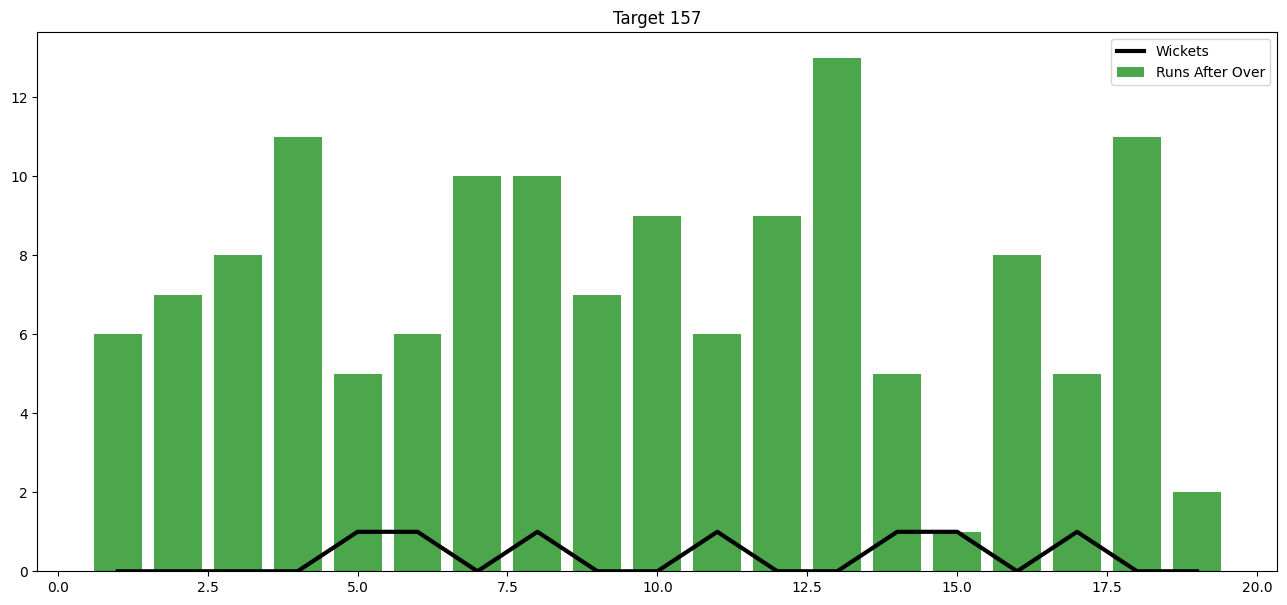

In [ ]:
temp, target = match_progress(deliveries_table, 5, pipeline)
print(temp)

plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['wickets_per_over'], color='Black',linewidth=3, label='Wickets')

plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')

plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  157
                    bowling_team      batting_team  end_of_over  \
377  Royal Challengers Bangalore  Delhi Daredevils            1   
384  Royal Challengers Bangalore  Delhi Daredevils            2   
390  Royal Challengers Bangalore  Delhi Daredevils            3   
396  Royal Challengers Bangalore  Delhi Daredevils            4   
402  Royal Challengers Bangalore  Delhi Daredevils            5   
408  Royal Challengers Bangalore  Delhi Daredevils            6   
414  Royal Challengers Bangalore  Delhi Daredevils            7   
420  Royal Challengers Bangalore  Delhi Daredevils            8   
428  Royal Challengers Bangalore  Delhi Daredevils            9   
434  Royal Challengers Bangalore  Delhi Daredevils           10   
440  Royal Challengers Bangalore  Delhi Daredevils           11   
446  Royal Challengers Bangalore  Delhi Daredevils           12   
452  Royal Challengers Bangalore  Delhi Daredevils           13   
459  Royal Challengers Bangalore  Delhi Darede

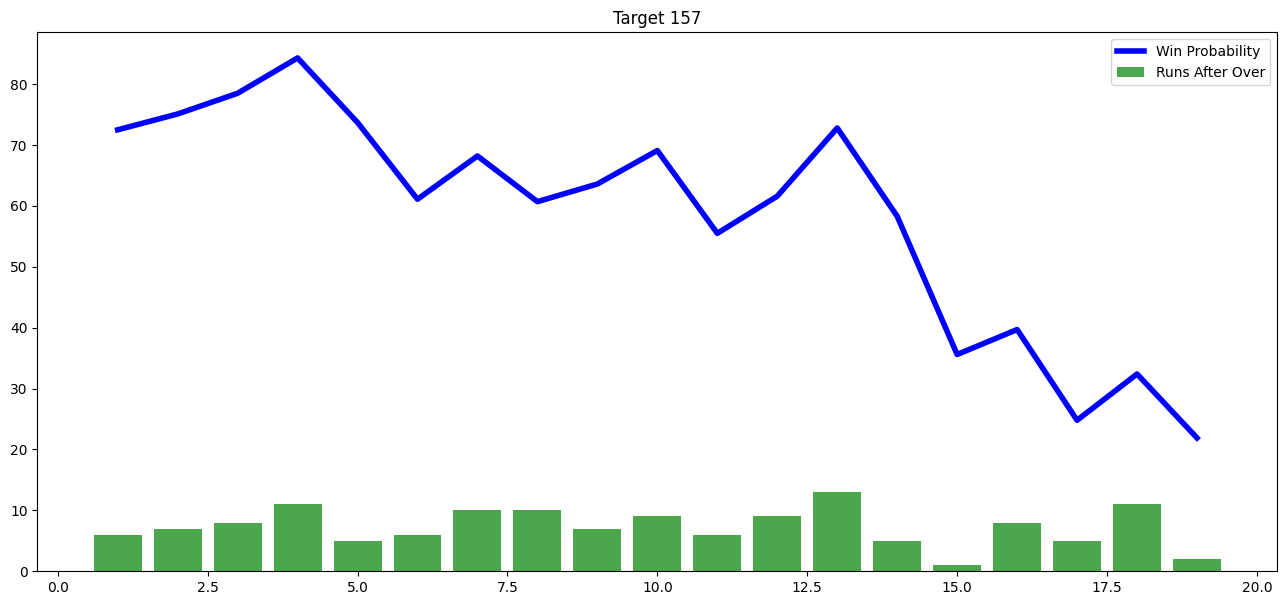

In [ ]:
temp, target = match_progress(deliveries_table, 5, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['win'], color='Blue', linewidth=4, label='Win Probability')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')

plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  157
                    bowling_team      batting_team  end_of_over  \
377  Royal Challengers Bangalore  Delhi Daredevils            1   
384  Royal Challengers Bangalore  Delhi Daredevils            2   
390  Royal Challengers Bangalore  Delhi Daredevils            3   
396  Royal Challengers Bangalore  Delhi Daredevils            4   
402  Royal Challengers Bangalore  Delhi Daredevils            5   
408  Royal Challengers Bangalore  Delhi Daredevils            6   
414  Royal Challengers Bangalore  Delhi Daredevils            7   
420  Royal Challengers Bangalore  Delhi Daredevils            8   
428  Royal Challengers Bangalore  Delhi Daredevils            9   
434  Royal Challengers Bangalore  Delhi Daredevils           10   
440  Royal Challengers Bangalore  Delhi Daredevils           11   
446  Royal Challengers Bangalore  Delhi Daredevils           12   
452  Royal Challengers Bangalore  Delhi Daredevils           13   
459  Royal Challengers Bangalore  Delhi Darede

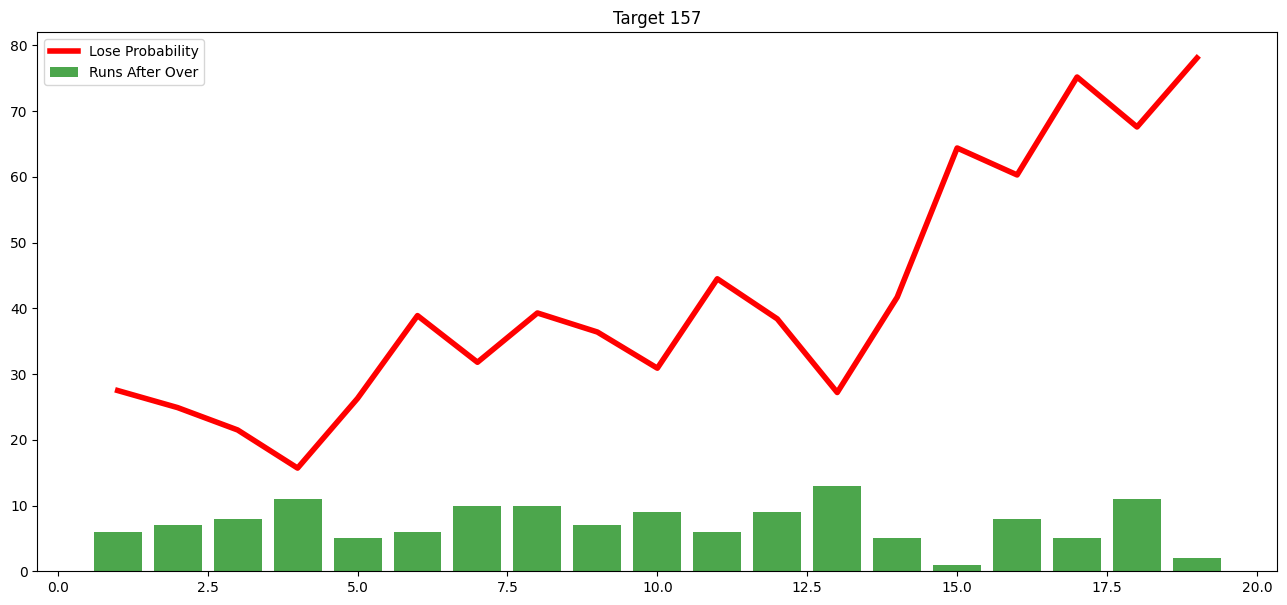

In [ ]:
temp, target = match_progress(deliveries_table, 5, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['lose'], color='Red', linewidth=4, label='Lose Probability')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  157
                    bowling_team      batting_team  end_of_over  \
377  Royal Challengers Bangalore  Delhi Daredevils            1   
384  Royal Challengers Bangalore  Delhi Daredevils            2   
390  Royal Challengers Bangalore  Delhi Daredevils            3   
396  Royal Challengers Bangalore  Delhi Daredevils            4   
402  Royal Challengers Bangalore  Delhi Daredevils            5   
408  Royal Challengers Bangalore  Delhi Daredevils            6   
414  Royal Challengers Bangalore  Delhi Daredevils            7   
420  Royal Challengers Bangalore  Delhi Daredevils            8   
428  Royal Challengers Bangalore  Delhi Daredevils            9   
434  Royal Challengers Bangalore  Delhi Daredevils           10   
440  Royal Challengers Bangalore  Delhi Daredevils           11   
446  Royal Challengers Bangalore  Delhi Daredevils           12   
452  Royal Challengers Bangalore  Delhi Daredevils           13   
459  Royal Challengers Bangalore  Delhi Darede

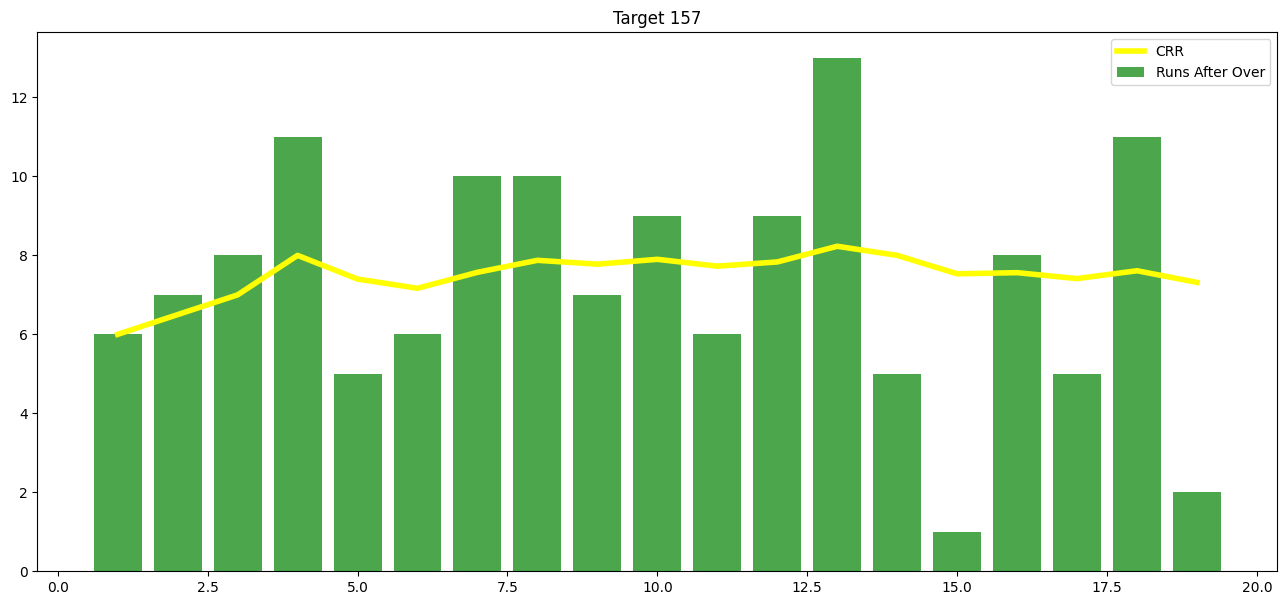

In [ ]:
temp, target = match_progress(deliveries_table, 5, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['current_runrate'], color='yellow', linewidth=4, label='CRR')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  157
                    bowling_team      batting_team  end_of_over  \
377  Royal Challengers Bangalore  Delhi Daredevils            1   
384  Royal Challengers Bangalore  Delhi Daredevils            2   
390  Royal Challengers Bangalore  Delhi Daredevils            3   
396  Royal Challengers Bangalore  Delhi Daredevils            4   
402  Royal Challengers Bangalore  Delhi Daredevils            5   
408  Royal Challengers Bangalore  Delhi Daredevils            6   
414  Royal Challengers Bangalore  Delhi Daredevils            7   
420  Royal Challengers Bangalore  Delhi Daredevils            8   
428  Royal Challengers Bangalore  Delhi Daredevils            9   
434  Royal Challengers Bangalore  Delhi Daredevils           10   
440  Royal Challengers Bangalore  Delhi Daredevils           11   
446  Royal Challengers Bangalore  Delhi Daredevils           12   
452  Royal Challengers Bangalore  Delhi Daredevils           13   
459  Royal Challengers Bangalore  Delhi Darede

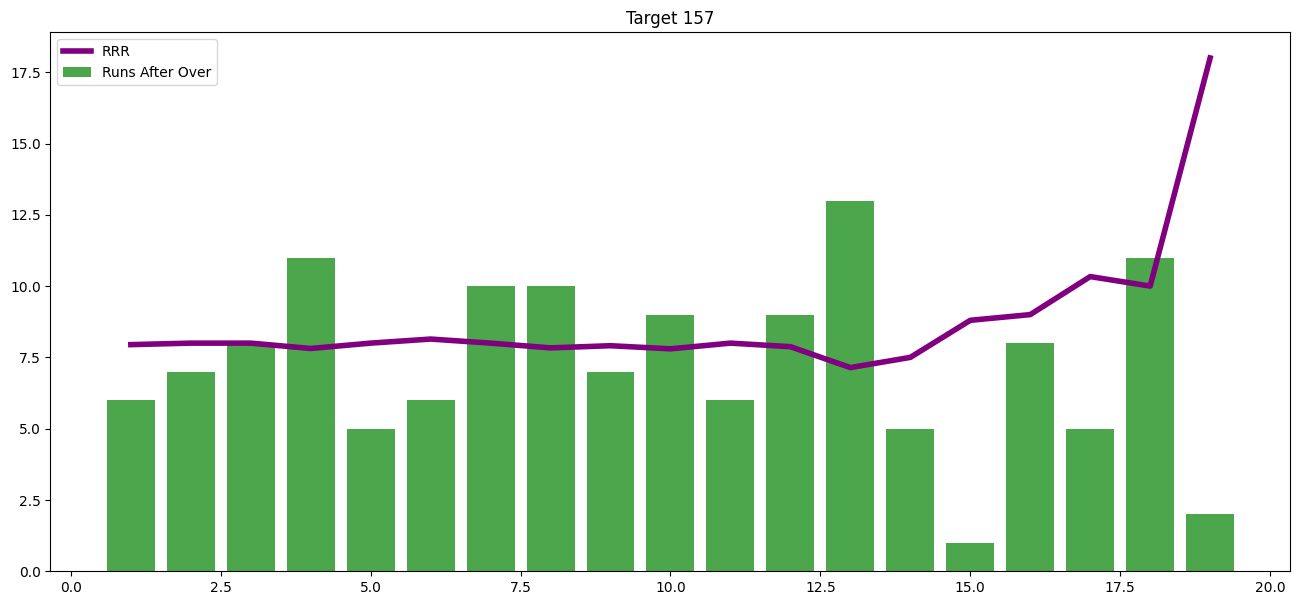

In [ ]:
temp, target = match_progress(deliveries_table, 5, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['Required_runrate'], color='purple', linewidth=4, label='RRR')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  178
              bowling_team                 batting_team  end_of_over  \
10459  Chennai Super Kings  Royal Challengers Bangalore            1   
10467  Chennai Super Kings  Royal Challengers Bangalore            2   
10473  Chennai Super Kings  Royal Challengers Bangalore            3   
10479  Chennai Super Kings  Royal Challengers Bangalore            4   
10485  Chennai Super Kings  Royal Challengers Bangalore            5   
10491  Chennai Super Kings  Royal Challengers Bangalore            6   
10497  Chennai Super Kings  Royal Challengers Bangalore            7   
10505  Chennai Super Kings  Royal Challengers Bangalore            8   
10511  Chennai Super Kings  Royal Challengers Bangalore            9   
10518  Chennai Super Kings  Royal Challengers Bangalore           10   
10524  Chennai Super Kings  Royal Challengers Bangalore           11   
10530  Chennai Super Kings  Royal Challengers Bangalore           12   
10536  Chennai Super Kings  Royal Challengers Ba

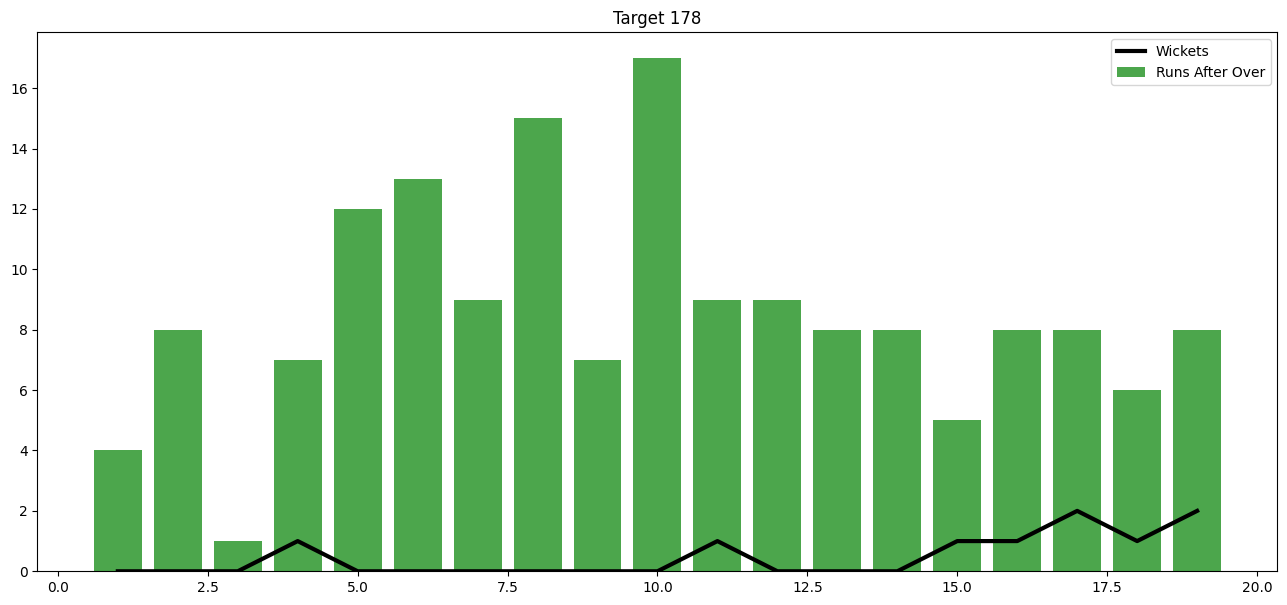

In [ ]:
temp, target = match_progress(deliveries_table, 74, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['wickets_per_over'], color='Black',linewidth=3,label='Wickets')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  178
              bowling_team                 batting_team  end_of_over  \
10459  Chennai Super Kings  Royal Challengers Bangalore            1   
10467  Chennai Super Kings  Royal Challengers Bangalore            2   
10473  Chennai Super Kings  Royal Challengers Bangalore            3   
10479  Chennai Super Kings  Royal Challengers Bangalore            4   
10485  Chennai Super Kings  Royal Challengers Bangalore            5   
10491  Chennai Super Kings  Royal Challengers Bangalore            6   
10497  Chennai Super Kings  Royal Challengers Bangalore            7   
10505  Chennai Super Kings  Royal Challengers Bangalore            8   
10511  Chennai Super Kings  Royal Challengers Bangalore            9   
10518  Chennai Super Kings  Royal Challengers Bangalore           10   
10524  Chennai Super Kings  Royal Challengers Bangalore           11   
10530  Chennai Super Kings  Royal Challengers Bangalore           12   
10536  Chennai Super Kings  Royal Challengers Ba

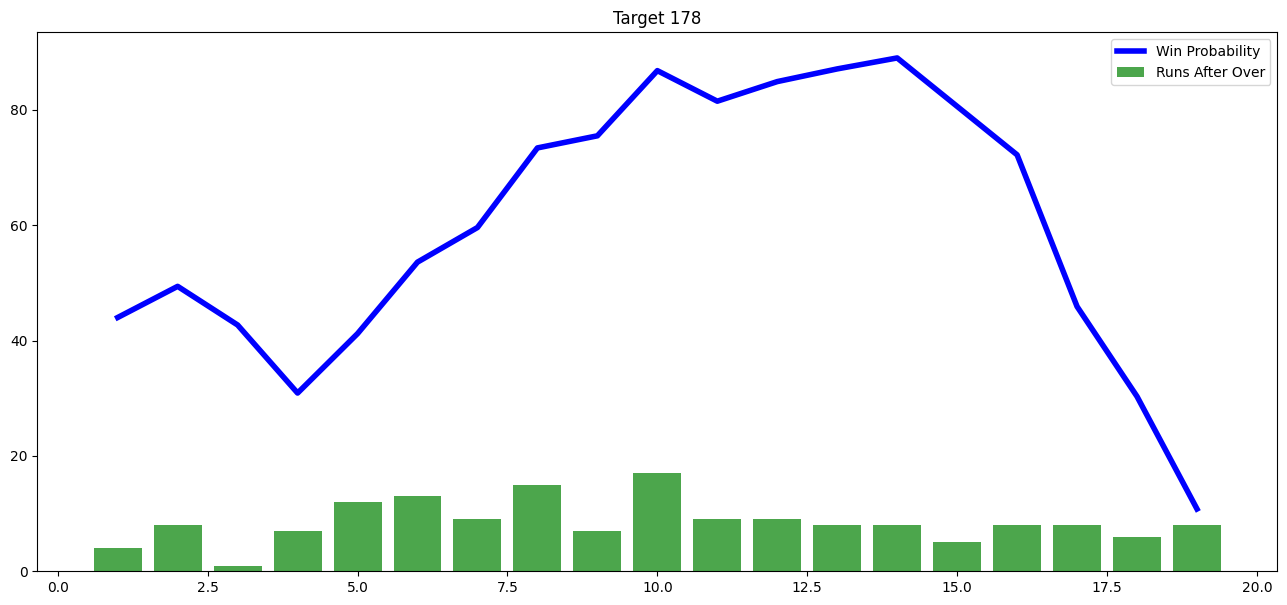

In [ ]:
temp, target = match_progress(deliveries_table, 74, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['win'], color='Blue', linewidth=4, label='Win Probability')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  178
              bowling_team                 batting_team  end_of_over  \
10459  Chennai Super Kings  Royal Challengers Bangalore            1   
10467  Chennai Super Kings  Royal Challengers Bangalore            2   
10473  Chennai Super Kings  Royal Challengers Bangalore            3   
10479  Chennai Super Kings  Royal Challengers Bangalore            4   
10485  Chennai Super Kings  Royal Challengers Bangalore            5   
10491  Chennai Super Kings  Royal Challengers Bangalore            6   
10497  Chennai Super Kings  Royal Challengers Bangalore            7   
10505  Chennai Super Kings  Royal Challengers Bangalore            8   
10511  Chennai Super Kings  Royal Challengers Bangalore            9   
10518  Chennai Super Kings  Royal Challengers Bangalore           10   
10524  Chennai Super Kings  Royal Challengers Bangalore           11   
10530  Chennai Super Kings  Royal Challengers Bangalore           12   
10536  Chennai Super Kings  Royal Challengers Ba

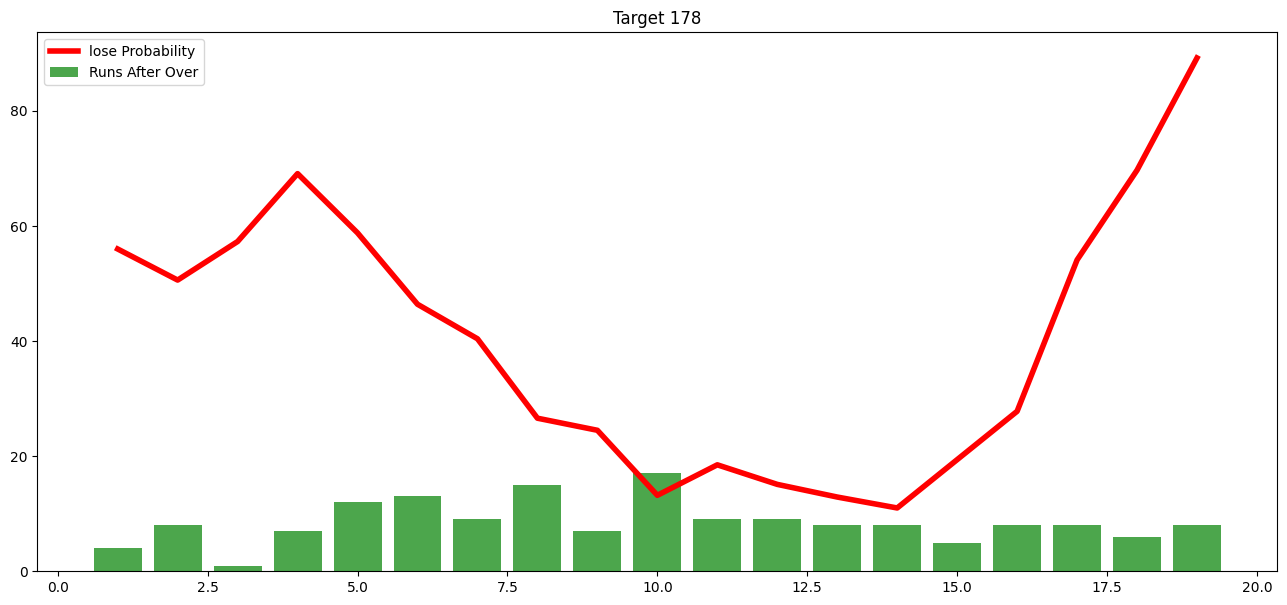

In [ ]:
temp, target = match_progress(deliveries_table, 74, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['lose'], color='red', linewidth=4, label='lose Probability')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  178
              bowling_team                 batting_team  end_of_over  \
10459  Chennai Super Kings  Royal Challengers Bangalore            1   
10467  Chennai Super Kings  Royal Challengers Bangalore            2   
10473  Chennai Super Kings  Royal Challengers Bangalore            3   
10479  Chennai Super Kings  Royal Challengers Bangalore            4   
10485  Chennai Super Kings  Royal Challengers Bangalore            5   
10491  Chennai Super Kings  Royal Challengers Bangalore            6   
10497  Chennai Super Kings  Royal Challengers Bangalore            7   
10505  Chennai Super Kings  Royal Challengers Bangalore            8   
10511  Chennai Super Kings  Royal Challengers Bangalore            9   
10518  Chennai Super Kings  Royal Challengers Bangalore           10   
10524  Chennai Super Kings  Royal Challengers Bangalore           11   
10530  Chennai Super Kings  Royal Challengers Bangalore           12   
10536  Chennai Super Kings  Royal Challengers Ba

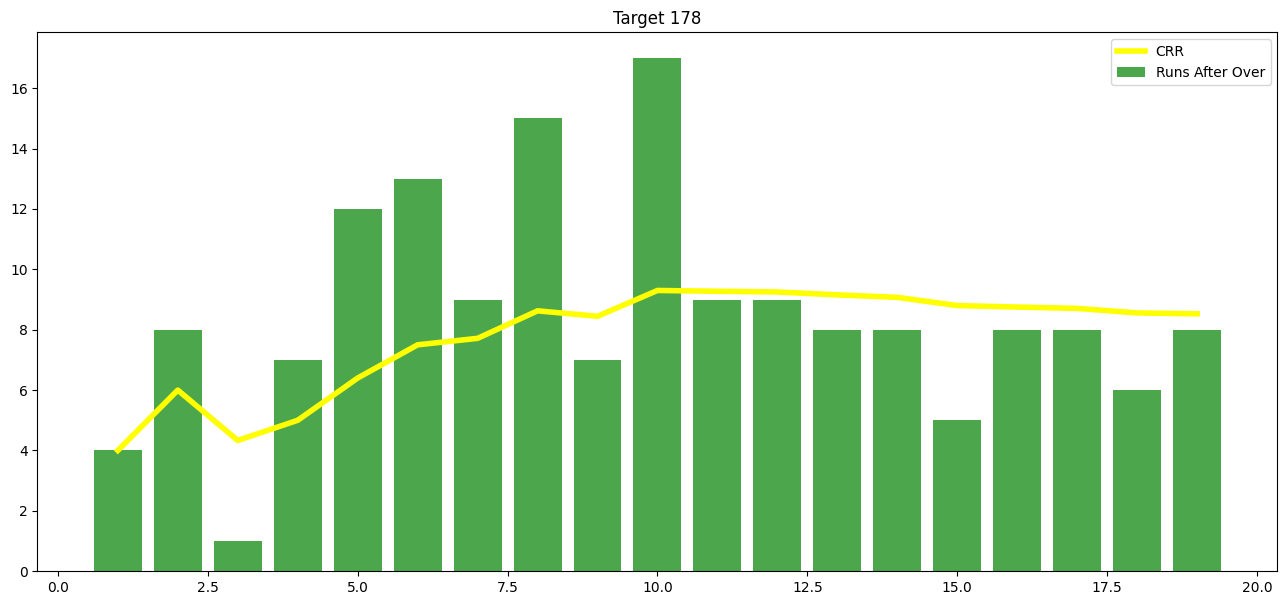

In [ ]:
temp, target = match_progress(deliveries_table, 74, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['current_runrate'], color='yellow', linewidth=4, label='CRR')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()

Target is:  178
              bowling_team                 batting_team  end_of_over  \
10459  Chennai Super Kings  Royal Challengers Bangalore            1   
10467  Chennai Super Kings  Royal Challengers Bangalore            2   
10473  Chennai Super Kings  Royal Challengers Bangalore            3   
10479  Chennai Super Kings  Royal Challengers Bangalore            4   
10485  Chennai Super Kings  Royal Challengers Bangalore            5   
10491  Chennai Super Kings  Royal Challengers Bangalore            6   
10497  Chennai Super Kings  Royal Challengers Bangalore            7   
10505  Chennai Super Kings  Royal Challengers Bangalore            8   
10511  Chennai Super Kings  Royal Challengers Bangalore            9   
10518  Chennai Super Kings  Royal Challengers Bangalore           10   
10524  Chennai Super Kings  Royal Challengers Bangalore           11   
10530  Chennai Super Kings  Royal Challengers Bangalore           12   
10536  Chennai Super Kings  Royal Challengers Ba

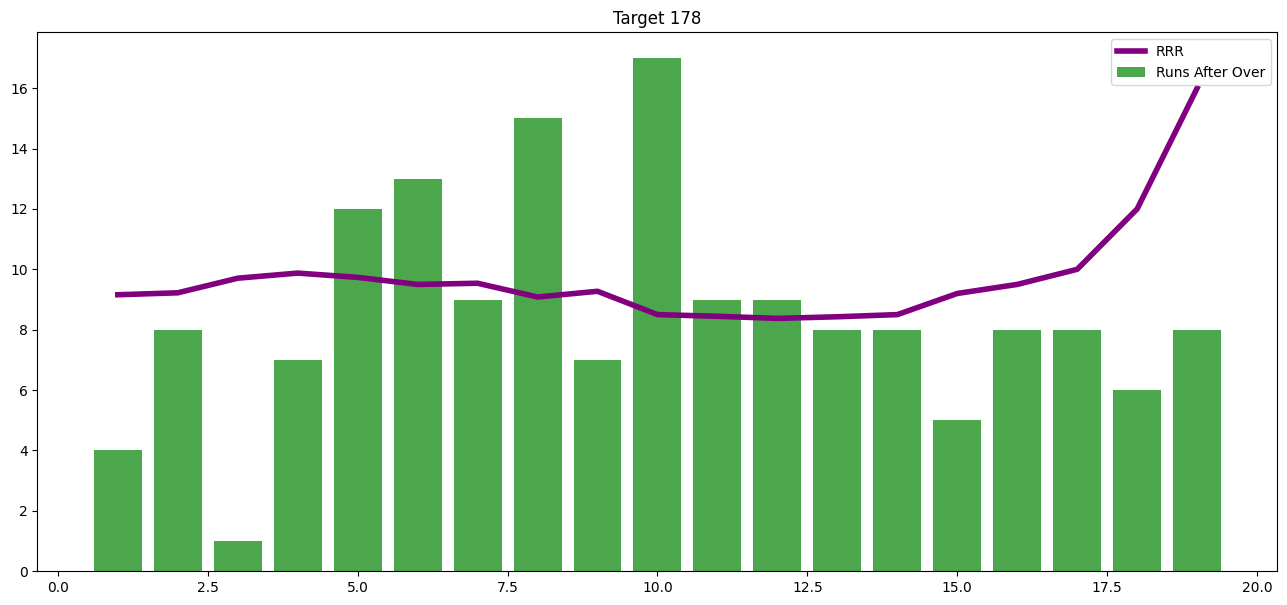

In [ ]:
temp, target = match_progress(deliveries_table, 74, pipeline)
print(temp)
plt.figure(figsize=(16, 7))
plt.plot(temp['end_of_over'], temp['Required_runrate'], color='purple', linewidth=4, label='RRR')
plt.bar(temp['end_of_over'], temp['runs_after_over'], color='Green', alpha=0.7, label='Runs After Over')
plt.title('Target ' + str(target))
plt.legend()
plt.show()